## 🧪 Análisis del Descenso por Gradiente en 2D

### 🎯 Objetivo

El objetivo es aproximar el **mínimo local** de una función multivariable \( f(x, y) \), utilizando un algoritmo de optimización basado en el **descenso por gradiente**.

---

### ⚙️ Parámetros

- **Δx**: Se utiliza para calcular las derivadas numéricas mediante el método de diferencias finitas.
- **α**: Tamaño del paso (_learning rate_), determina cuán grandes serán los cambios en \( x \) y \( y \) en cada iteración.
- **ϵ**: Tolerancia que define el criterio de parada. Si la diferencia entre dos valores consecutivos de la función es menor que este umbral, el algoritmo se detiene.

---


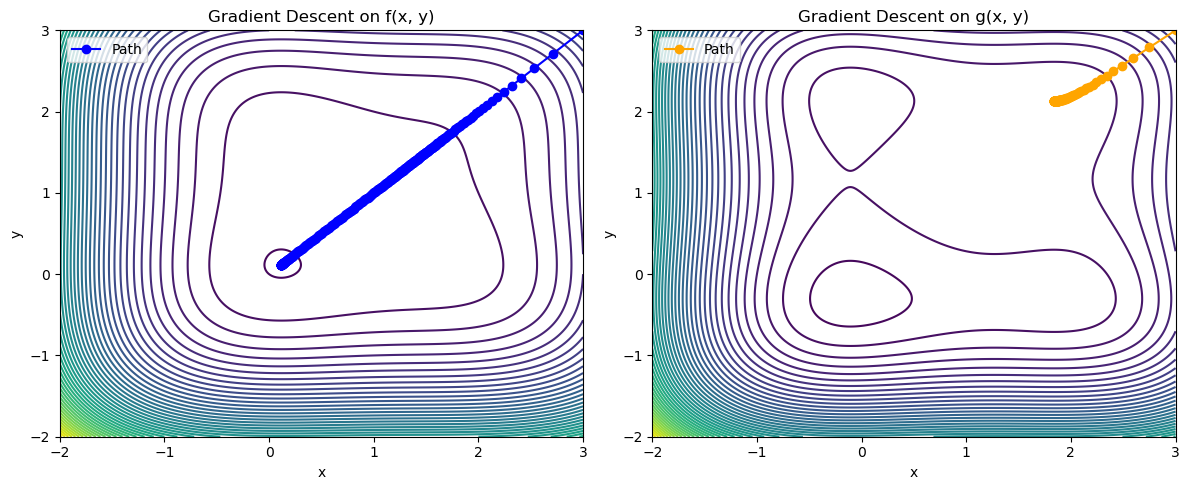

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent_2d(f, x0, y0, alpha=0.01, delta=1e-5, epsilon=1e-6, imax=1000):
    # b. Creamos listas para guardar el recorrido
    X, Y, F = [x0], [y0], [f(x0, y0)]  # c. X[0] = x0, Y[0] = y0, F[0] = f(x0, y0)

    xi, yi = x0, y0  # d. Punto inicial (xi, yi)

    for i in range(imax):  # g. Bucle con máximo número de iteraciones
        # e. Aproximamos las derivadas parciales por diferencia finita
        dfdx = (f(xi + delta, yi) - f(xi, yi)) / delta  # ∂f/∂x
        dfdy = (f(xi, yi + delta) - f(xi, yi)) / delta  # ∂f/∂y

        # f. Paso de descenso
        xi_new = xi - alpha * dfdx  # Actualizamos x usando gradiente descendente
        yi_new = yi - alpha * dfdy  # Actualizamos y usando gradiente descendente
        fi_new = f(xi_new, yi_new)  # Evaluamos f en el nuevo punto

        # g. Criterio de parada: si mejora < epsilon, frenamos
        if abs(fi_new - F[-1]) < epsilon:
            break

        # Actualizamos las listas con el nuevo punto
        X.append(xi_new)
        Y.append(yi_new)
        F.append(fi_new)

        # Preparamos la próxima iteración
        xi, yi = xi_new, yi_new

    # h. Devolvemos número de iteraciones y listas de trayectoria
    return i, X, Y, F

# i. Definimos las funciones f(x, y) y g(x, y)
def f(x, y):
    return (x - 1)**4 + (y - 1)**4 - (x - 1)**2 - (y - 1)**2 + x + y

def g(x, y):
    return (x - 1)**4 + (y - 1)**4 - 2*(x - 1)**2 - 3*(y - 1)**2 + x + y

# i. Aplicamos el optimizador desde el punto (0, 0)
i_f, X_f, Y_f, F_f = gradient_descent_2d(f, x0=3, y0=3, alpha=0.01)  # función f
i_g, X_g, Y_g, F_g = gradient_descent_2d(g, x0=3, y0=3, alpha=0.01)  # función g

# i. Graficamos las curvas de nivel y los caminos del optimizador

# Creamos una malla para graficar
x_vals = np.linspace(-2, 3, 400)
y_vals = np.linspace(-2, 3, 400)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)

# Evaluamos las funciones en la malla
Z_f = f(X_grid, Y_grid)  # Evaluación de f sobre la grilla
Z_g = g(X_grid, Y_grid)  # Evaluación de g sobre la grilla

# Subplot para f(x, y)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contour(X_grid, Y_grid, Z_f, levels=50)  # i.i. Curvas de nivel de f
plt.plot(X_f, Y_f, marker='o', color='blue', label='Path')  # i.ii. Camino del optimizador
plt.title('Gradient Descent on f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Subplot para g(x, y)
plt.subplot(1, 2, 2)
plt.contour(X_grid, Y_grid, Z_g, levels=50)  # i.i. Curvas de nivel de g
plt.plot(X_g, Y_g, marker='o', color='orange', label='Path')  # i.ii. Camino del optimizador
plt.title('Gradient Descent on g(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Mostrar todo junto
plt.tight_layout()
plt.show()




### ✅ **Gráfico 1 – Camino único al mínimo**


**Corresponde a los ítems de la consigna:**  
- **i.i**: Curvas de nivel  
- **i.ii**: Camino \( X_i, Y_i \) hacia el mínimo

**Análisis:**  
- En **f(x, y)** (gráfico izquierdo), el optimizador desciende ordenadamente hacia un único mínimo.
- En **g(x, y)** (gráfico derecho), también se alcanza un mínimo, pero la forma de la función sugiere múltiples valles.

**Conclusión:**  
- El camino seguido por el algoritmo es **siempre perpendicular a las curvas de nivel**, validando el funcionamiento correcto del gradiente descendente.




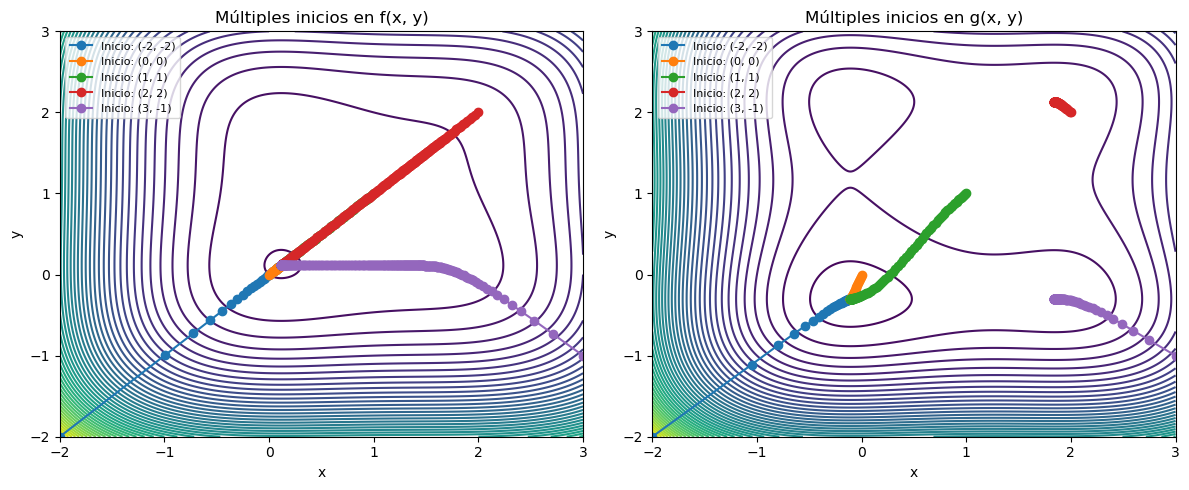

In [10]:
# Definimos una función para probar múltiples puntos de inicio
def probar_multiples_inicios(f, puntos_iniciales, alpha=0.01):
    resultados = []
    for x0, y0 in puntos_iniciales:
        _, X_path, Y_path, _ = gradient_descent_2d(f, x0, y0, alpha=alpha)
        resultados.append((X_path, Y_path, f'Inicio: ({x0}, {y0})'))
    return resultados

# Puntos de partida variados para probar
puntos_varios = [(-2, -2), (0, 0), (1, 1), (2, 2), (3, -1)]

# Ejecutamos para f(x, y) y g(x, y) con alpha moderado (0.01)
trayectorias_f = probar_multiples_inicios(f, puntos_varios, alpha=0.01)
trayectorias_g = probar_multiples_inicios(g, puntos_varios, alpha=0.01)

# Graficamos los caminos para f(x, y)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.contour(X_grid, Y_grid, Z_f, levels=50)
for X_path, Y_path, label in trayectorias_f:
    plt.plot(X_path, Y_path, marker='o', label=label)
plt.title("Múltiples inicios en f(x, y)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(fontsize=8)

# Graficamos los caminos para g(x, y)
plt.subplot(1, 2, 2)
plt.contour(X_grid, Y_grid, Z_g, levels=50)
for X_path, Y_path, label in trayectorias_g:
    plt.plot(X_path, Y_path, marker='o', label=label)
plt.title("Múltiples inicios en g(x, y)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(fontsize=8)

plt.tight_layout()
plt.show()


### 🔁 **Gráfico 2 – Múltiples puntos de partida**

**Corresponde a los ítems de la consigna:**  
- **i.i**: Curvas de nivel  
- **i.ii**: Caminos al mínimo  
- **i.iii**: Prueba con diferentes puntos iniciales

**Análisis:**  
- En **f(x, y)** (izquierda), todos los caminos conducen al mismo mínimo local, confirmando que tiene un único valle.
- En **g(x, y)** (derecha), los caminos divergen hacia distintos mínimos dependiendo del punto de partida, lo que evidencia que hay **múltiples mínimos locales**.

**Conclusión:**  
- En **f(x, y)** siempre se converge al mismo punto, independientemente del punto inicial.
- En **g(x, y)** la función tiene múltiples mínimos, y el resultado depende del lugar desde el que se inicia el descenso.



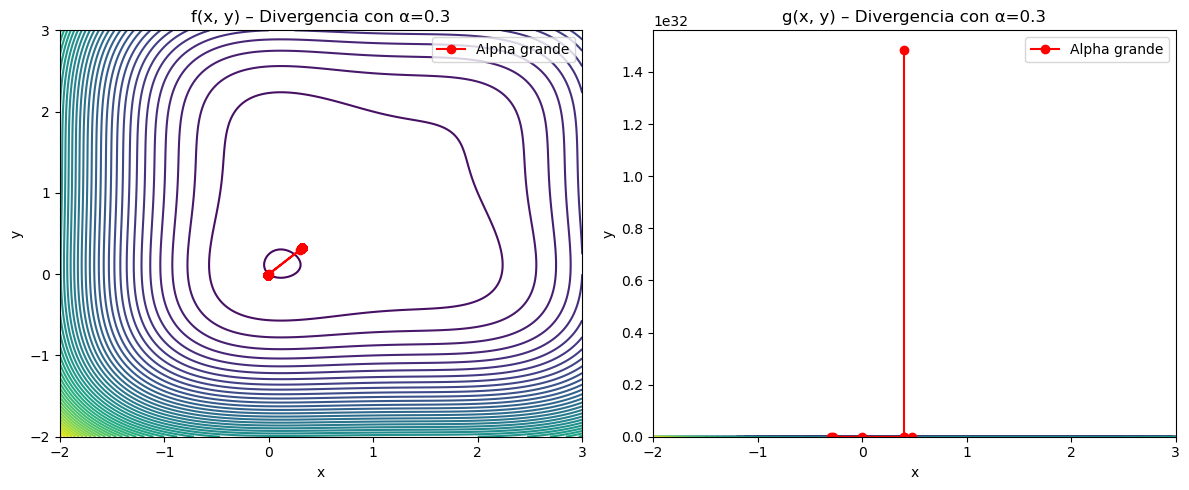

In [11]:
# Ahora probamos el punto i.iv – divergencia con alpha grande
_, X_f_div, Y_f_div, _ = gradient_descent_2d(f, x0=0, y0=0, alpha=0.3)
_, X_g_div, Y_g_div, _ = gradient_descent_2d(g, x0=0, y0=0, alpha=0.3)


# Graficamos el comportamiento con alpha grande
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contour(X_grid, Y_grid, Z_f, levels=50)
plt.plot(X_f_div, Y_f_div, marker='o', color='red', label='Alpha grande')
plt.title("f(x, y) – Divergencia con α=0.3")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.subplot(1, 2, 2)
plt.contour(X_grid, Y_grid, Z_g, levels=50)
plt.plot(X_g_div, Y_g_div, marker='o', color='red', label='Alpha grande')
plt.title("g(x, y) – Divergencia con α=0.3")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.tight_layout()
plt.show()

### ⚠️ **Gráfico 3 – Divergencia con \( α \) grande**

**Corresponde al ítem de la consigna:**  
- **i.iv**: Comprobar que si \( α \) es grande, el algoritmo no converge

**Análisis:**  
- En **f(x, y)** y **g(x, y)**, al usar un valor elevado de \( α = 0.3 \), el algoritmo **no logra converger**.
- En **f**, se observa oscilación y saltos. En **g**, ocurre una **explosión numérica**, con valores que se disparan fuera de escala.

**Conclusión:**  
- Un tamaño de paso demasiado grande hace que el algoritmo **salte el mínimo** repetidamente, impidiendo que se estabilice.
- Es fundamental elegir un valor de \( α \) lo suficientemente pequeño para garantizar una convergencia estable.

